# Tree and Ensemble Classifiers #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import ensemble

In [2]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [3]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

### Decision Tree Classifier ###

In [4]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_car_c_train, y_car_c_train)
dtc.score(X_car_c_test, y_car_c_test)

0.8868102711696721

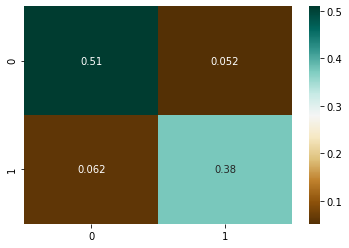

In [5]:
pred = dtc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [6]:
# viewing the decision tree graph
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph

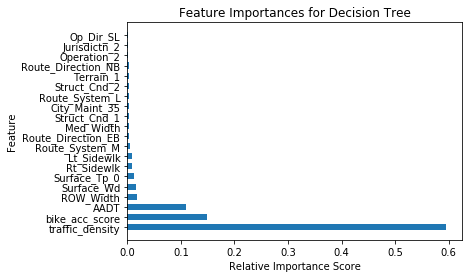

In [12]:
# view 20 most important features

dt_feature_importances = dtc.feature_importances_
dt_feature_names, dt_feature_scores = zip(*sorted(zip(X_car_c_train.columns, dt_feature_importances), 
                                                          key=lambda x: -x[1]))
y_position = list(range(len(dt_feature_names[:20])))
plt.barh(y_position, dt_feature_scores[:20], height=0.6, align='center')
plt.yticks(y_position , dt_feature_names[:20])
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

The decision tree is surprisingly effective for car accidents. Let's see how it performs for bike accidents.

In [13]:
dtc.fit(X_bike_c_train, y_bike_c_train)
dtc.score(X_bike_c_test, y_bike_c_test)

0.9010208211539327

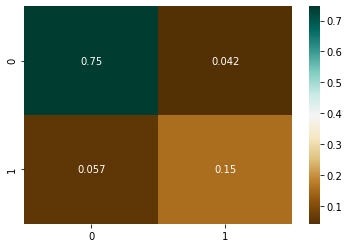

In [14]:
pred = dtc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

This actually works better for bike accidents, which is the first time I've found that!

### Random Forest Classifier ###

In [15]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_car_c_train, y_car_c_train)
score = rfc.score(X_car_c_test, y_car_c_test)
print('Random Forest Classifier accuracy score is {}'.format(score))

Random Forest Classifier accuracy score is 0.8851463776588568


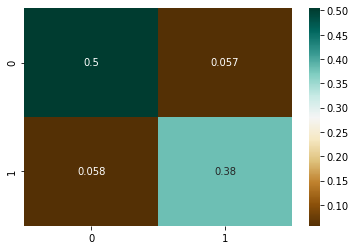

In [16]:
pred = rfc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

### Bagging Classifier ###

In [17]:
bc = ensemble.BaggingClassifier()
bc.fit(X_car_c_train, y_car_c_train)
score = bc.score(X_car_c_test, y_car_c_test)
print('Bagging Classifier accuracy score is {}'.format(score))

Bagging Classifier accuracy score is 0.8928362638845168


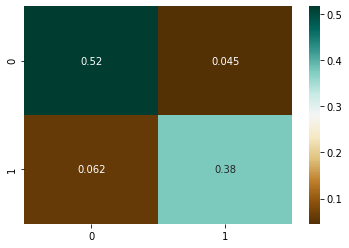

In [18]:
pred = bc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [19]:
c=confusion_matrix(y_car_c_test, pred)
c

array([[11473,  1010],
       [ 1373,  8381]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
c=classification_report(y_car_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12483
           1       0.89      0.86      0.88      9754

    accuracy                           0.89     22237
   macro avg       0.89      0.89      0.89     22237
weighted avg       0.89      0.89      0.89     22237



### Gradient Boosting Classifier

Gradient Boosting Score: 0.884606736520214


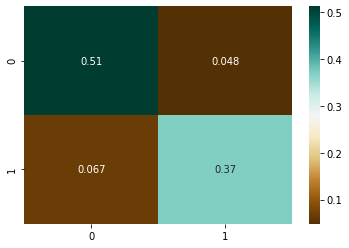

In [21]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_car_c_train, y_car_c_train)
print('Gradient Boosting Score: {}'.format(gbc.score(X_car_c_test, y_car_c_test)))
pred = gbc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)

In [22]:
c=classification_report(y_car_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12483
           1       0.88      0.85      0.87      9754

    accuracy                           0.88     22237
   macro avg       0.88      0.88      0.88     22237
weighted avg       0.88      0.88      0.88     22237



### AdaBoost Classifier ###

AdaBoost Score: 0.8585240814858119


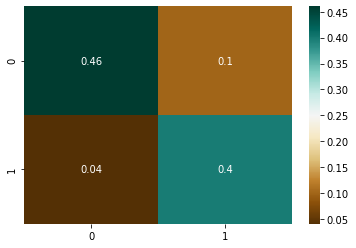

In [23]:
abc = ensemble.AdaBoostClassifier()
abc.fit(X_car_c_train, y_car_c_train)
score = abc.score(X_car_c_test, y_car_c_test)
print('AdaBoost Score: {}'.format(score))
pred = abc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred, normalize='all')
sns.heatmap(c,cmap='BrBG',annot=True)